In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
img = itk.imread("Data/BrainT1_OriginalSize.nii")

In [69]:
interpolator = itk.LinearInterpolateImageFunction.New(img)
resampler = itk.ResampleImageFilter.New(img)
resampler.SetOutputSpacing(.5)
#resampler.SetSize(itk.dict_from_image(img)['size'])
resampler.SetSize((320,384,320))
resampler.SetOutputDirection(img.GetDirection())
#resampler.SetOutputOrigin(img.GetOrigin())
resampler.SetOutputOrigin([0,0,0])
resampler.SetInterpolator(interpolator)
resampler.Update()
resampled = resampler.GetOutput()
meta_res = itk.dict_from_image(resampled)
meta_res

{'imageType': {'dimension': 3,
  'componentType': 'float32',
  'pixelType': 'Scalar',
  'components': 1},
 'name': '',
 'origin': (0.0, 0.0, 0.0),
 'spacing': (0.5, 0.5, 0.5),
 'size': (320, 384, 320),
 'direction': array([[-1.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  1.]]),
 'data': array([[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        

In [65]:
dictFromImage = itk.dict_from_image(img)
dictFromImage

{'imageType': {'dimension': 3,
  'componentType': 'float32',
  'pixelType': 'Scalar',
  'components': 1},
 'name': '',
 'origin': (-1.0, -1.0, 1.0),
 'spacing': (1.0, 1.0, 1.0),
 'size': (160, 192, 160),
 'direction': array([[-1.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  1.]]),
 'data': array([[[0.00462963, 0.00308642, 0.00617284, ..., 0.00540123,
          0.00231481, 0.00462963],
         [0.00462963, 0.00462963, 0.        , ..., 0.00385802,
          0.00617284, 0.00462963],
         [0.00385802, 0.00771605, 0.00925926, ..., 0.00617284,
          0.00694444, 0.0007716 ],
         ...,
         [0.0007716 , 0.00462963, 0.00848765, ..., 0.00771605,
          0.00231481, 0.00385802],
         [0.00385802, 0.00462963, 0.00462963, ..., 0.0007716 ,
          0.00848765, 0.00308642],
         [0.00848765, 0.00308642, 0.00925926, ..., 0.00540123,
          0.        , 0.00308642]],
 
        [[0.00462963, 0.00617284, 0.00462963, ..., 0.01003086,
          0.00925926, 0.004629

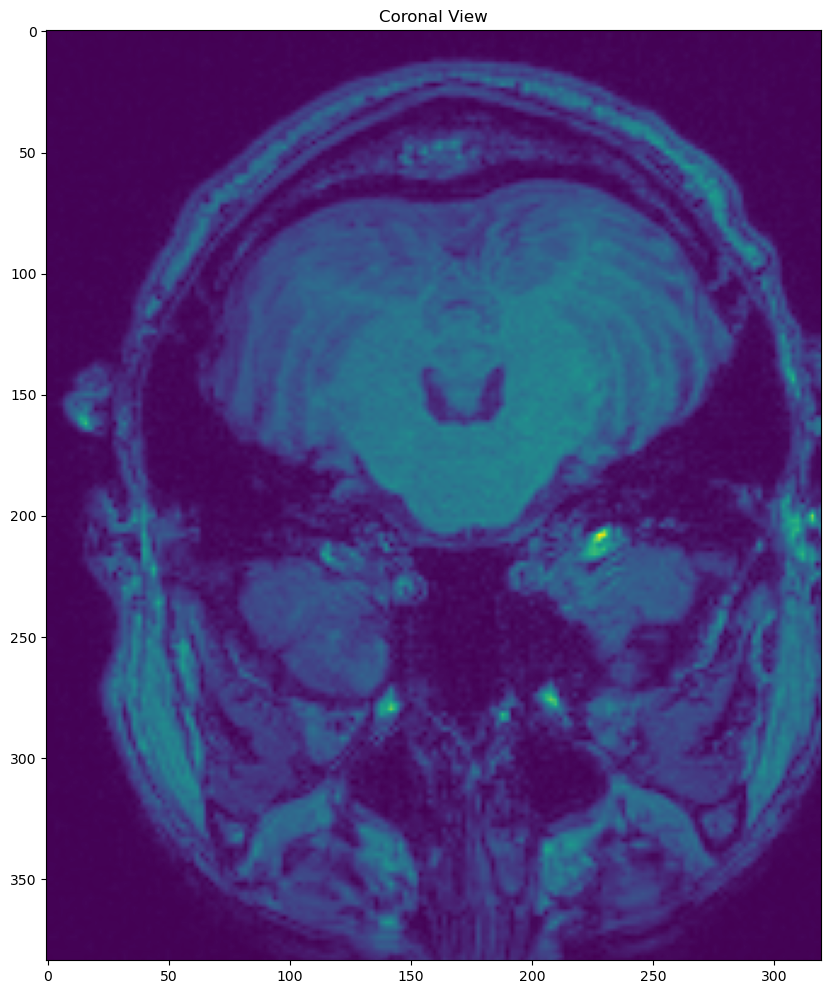

In [73]:
fig = plt.figure(figsize=(10,20))
img_np = np.asarray(resampled)

ax = fig.add_subplot(1,1,1)
ax.set_title("Coronal View")
#imgplot = plt.imshow(img_np[int(int(dict(img)['dim[1]'])/2),:,:])#origin = lower
#imgplot = plt.imshow(img_np[:,:,int(int(dict(img)['dim[3]'])/2)])
imgplot = plt.imshow(img_np[int(int(dict(img)['dim[1]'])/2),:,:])

ax = plt.gca()
ax.set_aspect((float(dict(img)['pixdim[3]']))/(float(dict(img)['pixdim[1]'])))

In [53]:
itk.dict_from_image(resampled)

{'imageType': {'dimension': 3,
  'componentType': 'float32',
  'pixelType': 'Scalar',
  'components': 1},
 'name': '',
 'origin': (-0.5, -0.5, 0.5),
 'spacing': (0.5, 0.5, 0.5),
 'size': (160, 192, 160),
 'direction': array([[-1.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  1.]]),
 'data': array([[[0.00462963, 0.00462963, 0.00385802, ..., 0.0154321 ,
          0.0162037 , 0.01697531],
         [0.00462963, 0.00462963, 0.00385802, ..., 0.0154321 ,
          0.0162037 , 0.01697531],
         [0.00462963, 0.00462963, 0.00424383, ..., 0.01003086,
          0.0152392 , 0.02044753],
         ...,
         [0.00540123, 0.00540123, 0.00810185, ..., 0.16049382,
          0.16473764, 0.16898148],
         [0.00424383, 0.00424383, 0.00597994, ..., 0.21682099,
          0.21624228, 0.21566358],
         [0.00308642, 0.00308642, 0.00385802, ..., 0.27314815,
          0.26774693, 0.26234567]],
 
        [[0.00462963, 0.00462963, 0.00385802, ..., 0.0154321 ,
          0.0162037 , 0.016975

In [36]:
img_np

array([[[0.00462963, 0.00385802, 0.00308642, ..., 0.0162037 ,
         0.01697531, 0.0150463 ],
        [0.00462963, 0.00424383, 0.00385802, ..., 0.0152392 ,
         0.02044753, 0.0162037 ],
        [0.00462963, 0.00462963, 0.00462963, ..., 0.01427469,
         0.02391975, 0.01736111],
        ...,
        [0.00424383, 0.00597994, 0.00771605, ..., 0.21624228,
         0.21566358, 0.19907407],
        [0.00308642, 0.00385802, 0.00462963, ..., 0.26774693,
         0.26234567, 0.21064815],
        [0.00771605, 0.00713735, 0.00655864, ..., 0.22511575,
         0.21643518, 0.17978394]],

       [[0.00462963, 0.00462963, 0.00462963, ..., 0.01234568,
         0.01388889, 0.01427469],
        [0.00462963, 0.00424383, 0.00385802, ..., 0.01089892,
         0.01466049, 0.01350309],
        [0.00462963, 0.00385802, 0.00308642, ..., 0.00945216,
         0.0154321 , 0.01273148],
        ...,
        [0.00617284, 0.00733025, 0.00848765, ..., 0.35397378,
         0.36882716, 0.31944445],
        [0.0

In [44]:
img.GetOrigin()

itkPointD3 ([-1, -1, 1])

In [68]:
itk.dict_from_image(img)['size']

(160, 192, 160)